In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import pickle
from sklearn.model_selection import train_test_split


In [2]:
data=pd.read_csv('output/integrators_log.csv')

In [7]:
data.head(2)

,Activity,Case ID,Hemoglobin,Sodium,Potassium,Dose,Responsive,Time
0,Exam,0,8.553793,139.486866,5.112623,NaN,True,2.247479
1,hemo_int,0,NaN,NaN,NaN,4.646207,NaN,48.095691


In [3]:
data.drop('Responsive',axis=1,inplace=True)

In [4]:
activities = ['Exam', 'hemo_int', 'hemo_inib',
       'sodium_int', 'sodium_inib', 'pot_int',
       'pot_inib', 'recovered',
       'Non responsive']

In [5]:
traces = [group.values.tolist() for _, group in data.groupby('Case ID')]
train,test=train_test_split(traces,test_size=0.2)

(array([2148., 2570.,  828.,    0.,    0.,    0.,    0.,    0.,  935.,
        3519.]),
 array([ 2. ,  4.4,  6.8,  9.2, 11.6, 14. , 16.4, 18.8, 21.2, 23.6, 26. ]),
 <BarContainer object of 10 artists>)

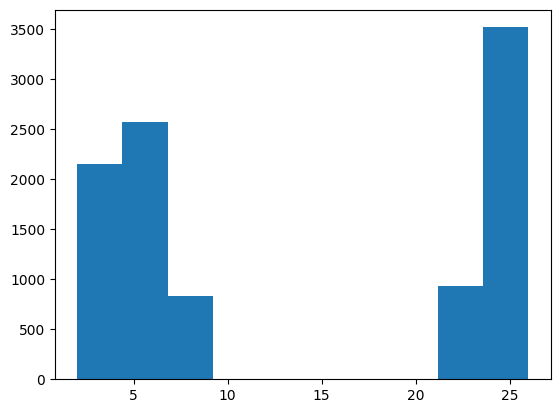

In [6]:
lengths=[len(trace) for trace in traces]
plt.hist(lengths)

In [11]:
recovered=[trace for trace in traces if trace[-1][0]=='recovered']
non_resp=[trace for trace in traces if trace[-1][0]=='Non responsive']

(array([ 342.,    0.,    0., 1806.,    0.,    0., 2570.,    0.,    0.,
         828.]),
 array([2. , 2.6, 3.2, 3.8, 4.4, 5. , 5.6, 6.2, 6.8, 7.4, 8. ]),
 <BarContainer object of 10 artists>)

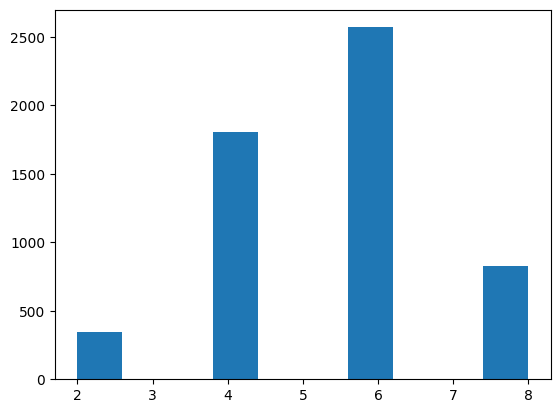

In [12]:
lengths_rec=[len(trace) for trace in recovered]
plt.hist(lengths_rec)

(array([ 935.,    0.,    0.,    0.,    0., 2561.,    0.,    0.,    0.,
         958.]),
 array([22. , 22.4, 22.8, 23.2, 23.6, 24. , 24.4, 24.8, 25.2, 25.6, 26. ]),
 <BarContainer object of 10 artists>)

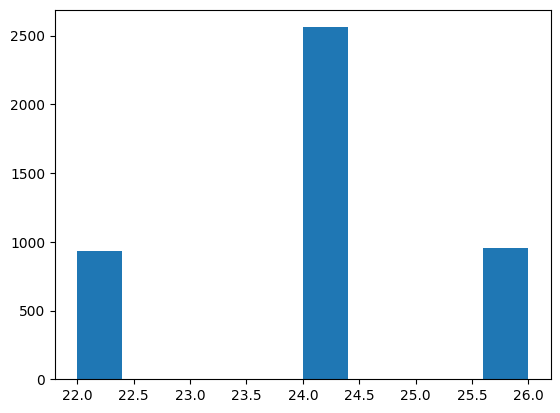

In [13]:
lengths_non_resp=[len(trace) for trace in non_resp]
plt.hist(lengths_non_resp)

In [ ]:
train[2]

In [6]:
n_activities = len(activities)
map_activities = dict(zip(activities, range(n_activities)))


def zeros(n):
    return [0 for _ in range(n)]

def hot_encode_activity(activity):
    encode = zeros(n_activities+5)
    encode[map_activities[activity[0]]] = 1
    encode[n_activities:] = activity[2:]
    return encode

def hot_encode_trace(trace):
    return [[hot_encode_activity(activity)] for activity in trace]

def trace_to_tensor(trace):
    return torch.tensor(hot_encode_trace(trace), dtype= torch.float32 )

In [7]:
Y_train = [torch.tensor([int(trace[-1][0]=='recovered')],dtype=torch.float) for trace in train]
Y_test = [torch.tensor([int(trace[-1][0]=='recovered')],dtype=torch.float) for trace in test]


reducedTraces_train=[trace[:-len(trace)//2] for trace in train]
transformedTraces_train=[trace_to_tensor(trace) for trace in reducedTraces_train]


reducedTraces_test=[trace[:-len(trace)//2] for trace in test]
transformedTraces_test=[trace_to_tensor(trace) for trace in reducedTraces_test]

In [27]:
for trace in transformedTraces_train:
  nan_mask=torch.isnan(trace)
  trace[nan_mask]=0


for trace in transformedTraces_test:
  nan_mask=torch.isnan(trace)
  trace[nan_mask]=0


In [28]:
with open('integrators_data_train.pickle', 'wb') as f:
    pickle.dump(transformedTraces_train, f)

with open('integrators_data_test.pickle', 'wb') as f:
    pickle.dump(transformedTraces_test, f)


with open('integrators_outputs_train.pickle', 'wb') as f:
    pickle.dump(Y_train, f)

with open('integrators_outputs_test.pickle', 'wb') as f:
    pickle.dump(Y_test, f)